# Samples of testing data


In [1]:
!pip install tensorflow_addons

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 KB 1.8 MB/s eta 0:00:00a 0:00:01


In [12]:
import random

from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow_addons as tfa

/home/oszymanski/.local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Building a dataset

In [3]:
random.seed(42)

companies = {}
product_names = ["T-shirt", "Jeans", "Jacket", "Sweater", "Dress"]
num_companies = 10

# building a dataset
for company_id in range(num_companies):
    products = { product : round(random.uniform(10, 100), 2) for product in product_names }
    companies[company_id] = products

print(companies)

'''
structure:
    { 0 : { 'T-shirt': 67.55 } }
    0 - company id
    'T-shirt' - product name
    67.55 - product price
'''

{0: {'T-shirt': 67.55, 'Jeans': 12.25, 'Jacket': 34.75, 'Sweater': 30.09, 'Dress': 76.28}, 1: {'T-shirt': 70.9, 'Jeans': 90.3, 'Jacket': 17.82, 'Sweater': 47.97, 'Dress': 12.68}, 2: {'T-shirt': 29.68, 'Jeans': 55.48, 'Jacket': 12.39, 'Sweater': 27.9, 'Dress': 68.49}, 3: {'T-shirt': 59.04, 'Jeans': 29.84, 'Jacket': 63.03, 'Sweater': 82.85, 'Dress': 10.58}, 4: {'T-shirt': 82.52, 'Jeans': 72.83, 'Jacket': 40.62, 'Sweater': 23.99, 'Dress': 96.15}, 5: {'T-shirt': 40.29, 'Jeans': 18.35, 'Jacket': 18.7, 'Sweater': 86.27, 'Dress': 64.34}, 6: {'T-shirt': 82.64, 'Jeans': 75.68, 'Jacket': 58.26, 'Sweater': 97.58, 'Dress': 44.07}, 7: {'T-shirt': 59.68, 'Jeans': 84.65, 'Jacket': 65.67, 'Sweater': 87.55, 'Dress': 61.96}, 8: {'T-shirt': 73.41, 'Jeans': 14.12, 'Jacket': 30.51, 'Sweater': 36.04, 'Dress': 17.18}, 9: {'T-shirt': 30.95, 'Jeans': 19.09, 'Jacket': 35.02, 'Sweater': 67.21, 'Dress': 42.83}}


"\nstructure:\n    { 0 : { 'T-shirt': 67.55 } }\n    0 - company id\n    'T-shirt' - product name\n    67.55 - product price\n"

In [4]:
def simulate_sales_with_profit( companies : dict, sim_months=24, init_customers=100, monthly_customer_growth=10, platform_fee_percentage=7.5, tax_rate=23, dbg=False ):
    '''
    companies - company data,
    sim_months - number of months to simulate,
    init_customers - initial number of customers,
    monthly_customer_growth - growth rate of customers per month,
    platform_fee_percentage - fee percentage for platform,
    tax_rate - tax rate for profit,
    dbg - debug mode;

    Note: function can be used since the company started with a specific number of customers (init_customers). This
    argument of course can be changed/reset or used in a different timestamp, to analyze/forecast data for different
    time periods - not specifically from the beginning.
    '''

    sales_data = []

    for month in range( 1, sim_months + 1 ):
        current_customers = init_customers + ( (month - 1) * monthly_customer_growth )

        for company_id, products in companies.items():
            for product, price in products.items():

                # calculating COGS (cost of goods sold), which is about 40-60% of a product price
                cogs_percent = random.uniform(0.4, 0.6)
                cogs = price * cogs_percent

                # simulation of units sold
                units_sold = max(0, int( random.gauss(mu=0.05 * current_customers, sigma=2) ))

                # financial metrics calculation
                revenue = units_sold * price
                total_cogs = units_sold * cogs
                total_profit = revenue - total_cogs

                # platform fee
                platform_fee = revenue * (platform_fee_percentage / 100) if units_sold > 0 else 0

                # profit calculations
                gross_profit = revenue - total_cogs
                profit_pre_tax = gross_profit - platform_fee
                tax = profit_pre_tax * (tax_rate / 100)
                profit_after_tax = profit_pre_tax - tax

                # put everything together, creating a dataset (type: DataFrame)
                sales_data.append({
                    'month' : month,                            # int
                    'company_id' : company_id,                  # int
                    'product' : product,                        # str
                    'units_sold' : units_sold,                  # int
                    'cogs' : total_cogs,                        # float
                    'revenue' : revenue,                        # float
                    'platform_fee' : platform_fee,              # float
                    'tax' : tax,                                # int
                    'profit_pre_tax' : profit_pre_tax,          # float
                    'profit_after_tax' : profit_after_tax,      # float
                    'current_customers' : current_customers     # int
                })
    if (dbg): print(sales_data)

    return pd.DataFrame(sales_data)



In [5]:
df_24month_selling_data = simulate_sales_with_profit(companies)
print(f'df_24month_selling_data:\n{df_24month_selling_data}')

df_24month_selling_data:
      month  company_id  product  units_sold        cogs  revenue  \
0         1           0  T-shirt           5  160.105724   337.75   
1         1           0    Jeans           6   43.168822    73.50   
2         1           0   Jacket           4   73.615384   139.00   
3         1           0  Sweater           4   65.695540   120.36   
4         1           0    Dress           0    0.000000     0.00   
...     ...         ...      ...         ...         ...      ...   
1195     24           9  T-shirt          18  282.740352   557.10   
1196     24           9    Jeans          13  107.616884   248.17   
1197     24           9   Jacket          17  329.332510   595.34   
1198     24           9  Sweater          17  582.648129  1142.57   
1199     24           9    Dress          17  404.117509   728.11   

      platform_fee         tax  profit_pre_tax  profit_after_tax  \
0         25.33125   35.031996      152.313026        117.281030   
1         

## Exploratory data analysis
Visualizing trends and understanding data

### Units sold each month

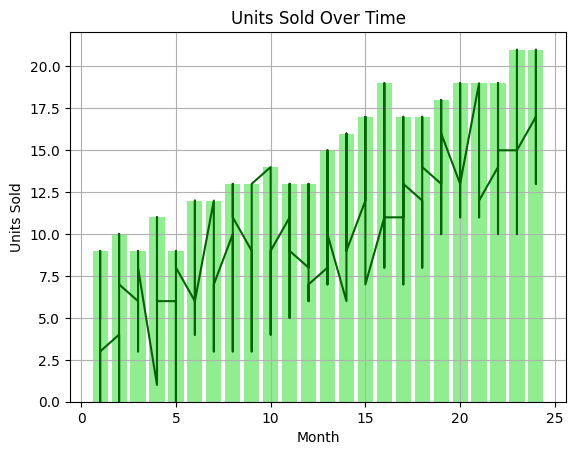

In [6]:
plt.bar( df_24month_selling_data['month'], df_24month_selling_data['units_sold'], color='lightgreen' )
plt.plot( df_24month_selling_data['month'], df_24month_selling_data['units_sold'], color='darkgreen' )
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Units Sold Over Time')
plt.grid()
plt.show()

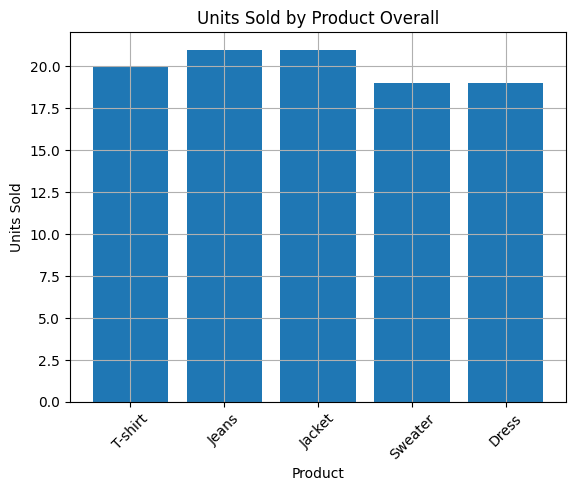

In [7]:
plt.bar(df_24month_selling_data['product'], df_24month_selling_data['units_sold'])
plt.xlabel( 'Product' )
plt.ylabel( 'Units Sold' )
plt.title( 'Units Sold by Product Overall' )
plt.xticks( rotation=45 )
plt.grid()
plt.show()

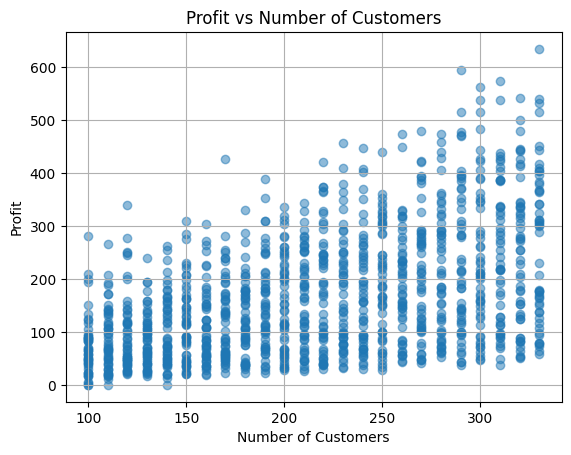

In [8]:
# number of customers vs profit
plt.scatter(df_24month_selling_data['current_customers'], df_24month_selling_data['profit_after_tax'], alpha=0.5)
plt.xlabel('Number of Customers')
plt.ylabel('Profit')
plt.title('Profit vs Number of Customers')
plt.grid()
plt.show()

# Model Build

### Data preperation for model training

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df_24month_selling_data.drop(columns=['profit_after_tax']),
    df_24month_selling_data['profit_after_tax'],
    test_size=0.2,
    random_state=42
)
X_train = pd.get_dummies(X_train, columns=['product'], prefix=['product'])
X_test = pd.get_dummies(X_test, columns=['product'], prefix=['product'])

missing_cols_train = set(X_test.columns) - set(X_train.columns)
for c in missing_cols_train:
    X_train[c] = 0

missing_cols_test = set(X_train.columns) - set(X_test.columns)
for c in missing_cols_test:
    X_test[c] = 0

X_train = X_train[X_test.columns]

numerical_features = ['month', 'company_id', 'units_sold', 'cogs', 'revenue', 'platform_fee', 'tax', 'profit_pre_tax', 'current_customers']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.apply(pd.to_numeric, errors='coerce'))
X_test = scaler.transform(X_test.apply(pd.to_numeric, errors='coerce'))

In [16]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', tfa.metrics.RSquare()])
model.summary()
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                960       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 34113 (133.25 KB)
Trainable params: 34113 (133.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/1000
30/30 [==============================] - 0s 3ms/step - loss: 37669.6875 - mae: 157.2836 - r_square: -1.7702 - val_loss: 27881.4492 - val_mae: 132.7852 - val_r_square: -1.0870
Epoch 2/1000
30/30 [==============================] - 0s 1ms/step - loss: 9241.7275 - mae: 71.6284 - r_square: 0.3204 - val_loss: 2480.2942 - val_mae: 40.6254 - val_r_square: 0.8143
Epoch 3/1000
30/30 [==============================] - 0s 999us/step - loss: 1952.3876 - mae: 35.2038 - r_square: 0.8564 - val_loss: 1515.6576 - val_mae: 31.5673 - val_r_square: 0.8865
Epoch 4/1000
30/30 [==============================] - 0s 925us/step - loss: 1190.1898 - mae: 27.7086 - r_square: 0.9125 - val_loss: 939.4763 - val_mae: 25.1724 - val_r_square: 0.9297
Epoch 5/1000
30/30 [==============================] - 0s 942us/step - loss: 745.2105 - mae: 21.6638 - r_square: 0.9452 - val_loss: 551.3635 - val_mae: 18.5737 - val_r_square: 0.9587
Epoch 6/1000
30/30 [==============================] - 0s 947us/step - loss: 434.8

### Results of model accuarcy

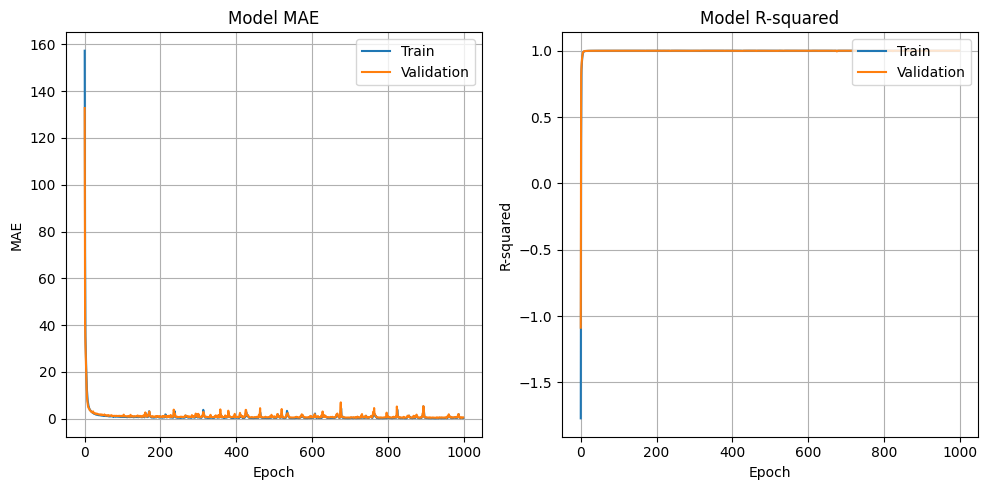

In [20]:
# Plot training & validation MAE values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()

# Plot training & validation R-squared values
plt.subplot(1, 2, 2)
plt.plot(history.history['r_square'])
plt.plot(history.history['val_r_square'])
plt.title('Model R-squared')
plt.ylabel('R-squared')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.grid()
plt.tight_layout()
plt.show()

# Model testing

# Final results